In [1]:
## Outlier Detection Using Local Outlier Factor

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
sales_score = pd.read_csv('salesman_sales_score.csv')

sales_score.sample(5)

,SalesHoursSpend,SalesScore,Outliers
109,928,12.000000,True
72,647,94.069916,False
121,992,99.899724,False
103,900,13.000000,True
22,156,3.654435,False


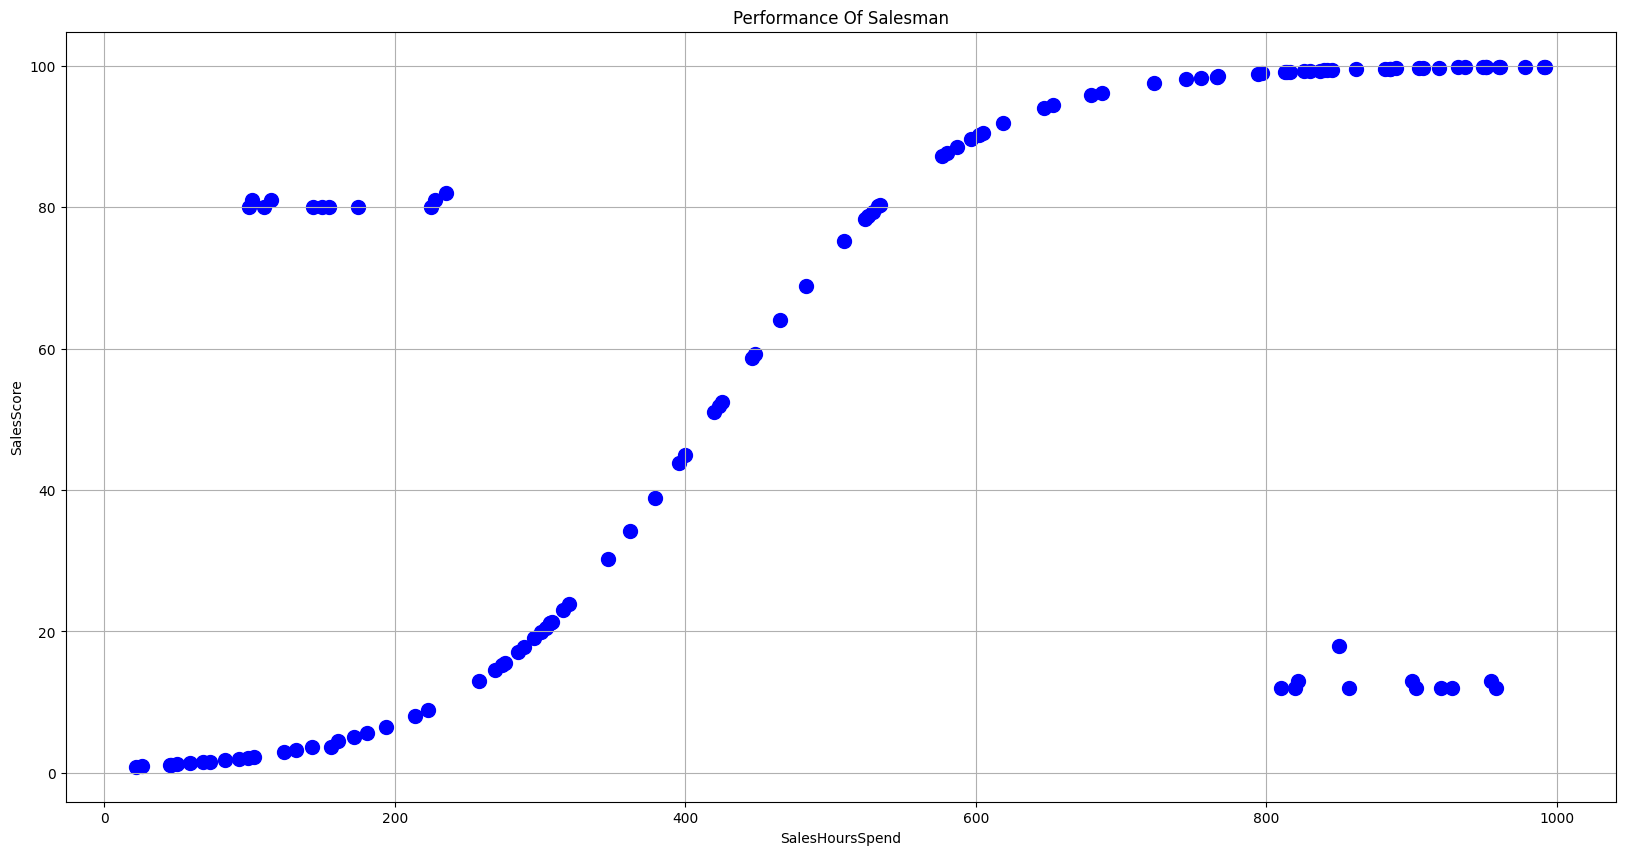

In [5]:
# Scatter Plot to see how many hours salesman sales vs SalesScore

fig, ax = plt.subplots(figsize = (20, 10))

plt.scatter(sales_score['SalesHoursSpend'],
           sales_score['SalesScore'],
           color = 'blue',
           s = 100)

ax.set(xlabel = 'SalesHoursSpend',
      ylabel = 'SalesScore',
      title = 'Performance Of Salesman')

ax.grid()
plt.show()

In [6]:
# Now we will drop the Outlier Column and write LOF algorithm to detect outliers based on density
X = sales_score.drop('Outliers', axis=1)

X.head()

,SalesHoursSpend,SalesScore
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


In [7]:
#LOCAL OUTLIER FACTOR (LOF)
'''
This algorithm works by calculating local density for a data point. For each data point, it then measures the
local deviation of the density of each sample with respect to its neighbor. The number of neighbors that it should
compare a data point to is specified as 20 in below parameter (n_neighbors)

If we know percentage of outliers expected in dataset, we can use contamination factor
else algorithm (sklearn lib) will take care of it. In students dataset, roughly 20% outlier
points are there, therefore I am using 0.2 value

fit_predict is used to find outlier points in data. it returns -1 for outliers in dataset.

'''

from sklearn.neighbors import LocalOutlierFactor

In [8]:
lof = LocalOutlierFactor(n_neighbors=20,
                        contamination = 0.2)

In [9]:
y_predict = lof.fit_predict(X)

y_predict

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [10]:
# if we calculate number of -1s in above output, we can determine number of anomalous points

num_outliers = (y_predict == -1).sum()

num_outliers

25

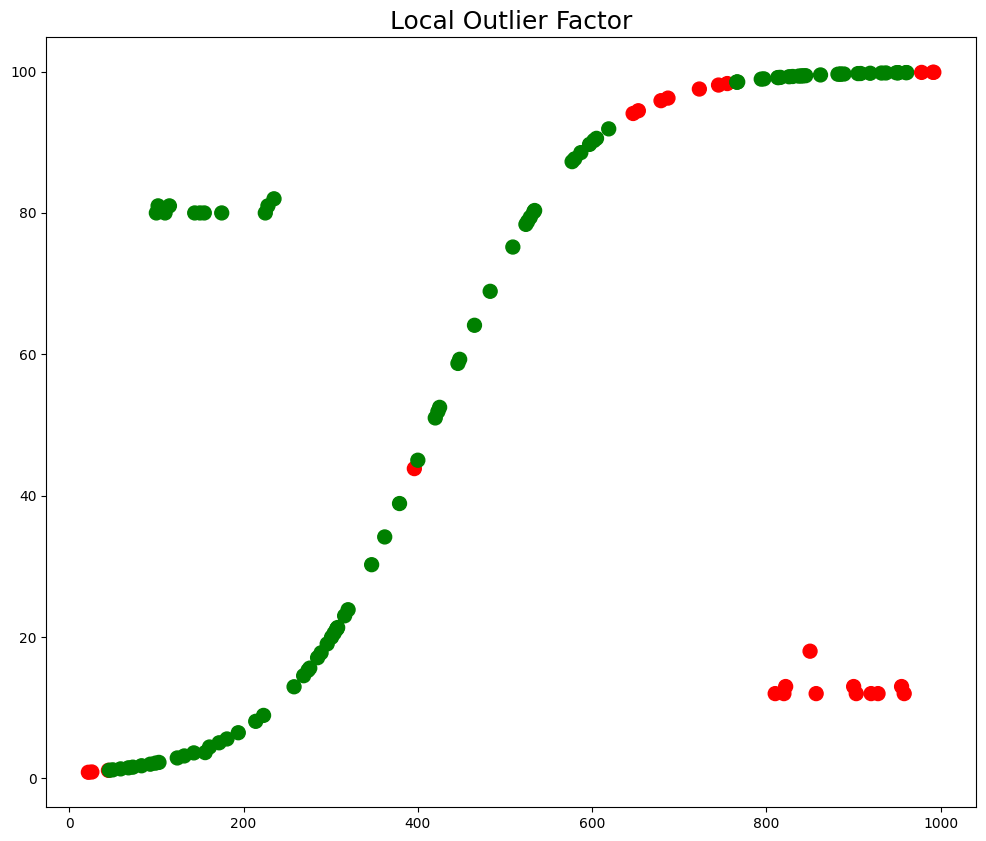

In [11]:
'''
Lets Visualize the anomolous points. Red will be anamolous and Green will be inliers/shows normal behavior
I use Scatter Plot to visualize this
'''

colors = np.array(['r', 'g'])

plt.figure(figsize = (12, 10))

plt.title('Local Outlier Factor', size = 18)

plt.scatter(sales_score['SalesHoursSpend'],
           sales_score['SalesScore'],
           s=100,
           color=colors[(y_predict + 1) // 2])

plt.show()

In [12]:
'''
When this algorithm runs on data, every sample in dataset is associated with a score reflecting the degree of abnormality
of that observation. This score is called LOF Score.

The negative of the LOF score for each sample is obtained by using lof.negative_outlier_factor_

Points which have this negative_outlier_factor scores close to -1 are considered inlier. Outliers/Anomolies
will have scores which are further away from -1

'''

X_Scores = lof.negative_outlier_factor_

X_Scores

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938,
       -1.03039928, -0.98395541, -0.97939208, -1.01269424, -0.96696018,
       -0.96737591, -0.99460791, -0.97612705, -0.95809487, -1.01195749,
       -1.01531276, -1.02251399, -0.95511057, -0.95961389, -0.96145326,
       -1.02771782, -0.96891175, -0.97850146, -0.98619115, -0.99666125,
       -0.99361717, -0.99170612, -0.99282767, -1.0128736 , -1.00195489,
       -1.00102812, -1.00025359, -0.9905836 , -0.98924894, -0.97888615,
       -0.97709147, -0.97796595, -0.98004792, -0.98004792, -0.98118573,
       -0.98656031, -0.98884869, -1.01038906, -1.04174962, -1.04964314,
       -1.05547725, -1.04610136, -1.03406249, -1.01951322, -1.02146054,
       -1.03259426, -1.01717545, -1.02345066, -1.02929812, -1.03763217,
       -1.02886507, -1.02886507, -1.030146  , -1.03107404, -1.03100017,
       -1.02456492, -1.02425818, -1.02938883, -1.04024032, -1.04

In [13]:
'''
LOF results are best viewed using cirles where radius of circle respresent the degree of 
abnormality of a data point.

To represnt it using circle

Step#1 - Scale all negative_outlier_factor scores to be in the range of 0 - 1
         (Maximum value of Score - Score) Divided by Range (Max Value - Min Value) of scores

Step#2 - Once we have these radius values, we can plot using matplotlib. Default radius is very small
         so its value is multipled by 1000 to better visualization

OUTPUT - Every data point is represented as hallow circle and diameter of circle represnts the degree
         of abnormality for a point.
'''

radius = (X_Scores.max() - X_Scores) / (X_Scores.max() - X_Scores.min())

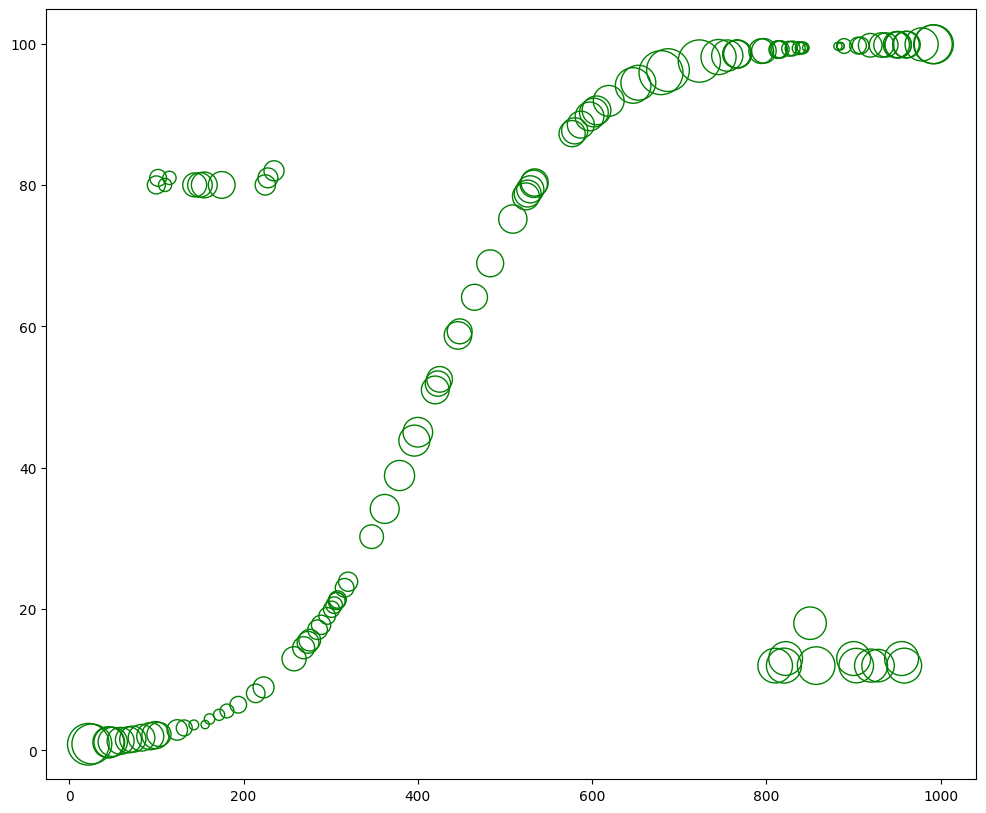

In [14]:
plt.figure(figsize=(12, 10))

plt.scatter(sales_score['SalesHoursSpend'],
           sales_score['SalesScore'],
           s= 1000* radius,
           edgecolors = 'g',
           facecolors = 'none',
           label = 'LOF Outlier Score')

plt.show()